In [30]:
import matplotlib.pyplot as plt
import numpy as np
# Importing the dataset from keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [31]:
# Checking the ‘type’
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [32]:
# Checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


<Figure size 640x480 with 0 Axes>

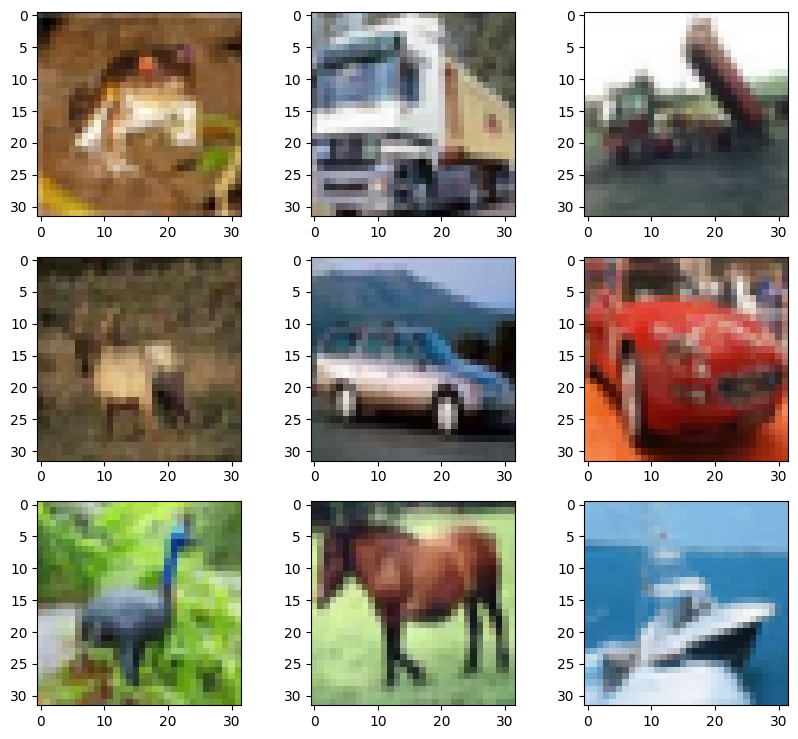

In [33]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [34]:
# Printing examples in 'y_train'
for i in range(5):
  print(y_train[i])

[6]
[9]
[9]
[4]
[1]


In [35]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0
255


In [36]:
# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [42]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())
a, b, c, d = x_train.shape
x_train = x_train.reshape((a, b * c * d))

0.0
1.0


In [43]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(x_train)

MiniBatchKMeans(n_clusters=10)

In [44]:
kmeans.labels_

array([1, 4, 5, ..., 5, 6, 5])

In [45]:
def retrieve_info(cluster_labels,y_train):
  '''
  Associates most probable label with each cluster in KMeans model
  returns: dictionary of clusters assigned to each label
  '''
  # Initializing
  reference_labels = {}
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [49]:
y_train = np.reshape(y_train, y_train.size)

In [50]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [51]:
# Comparing Predicted values and Actual values
print(number_labels[:20].astype('int'))
print(y_train[:20])

[5 8 9 6 9 6 4 4 0 6 6 9 9 4 9 8 9 5 9 4]
[6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6]


In [52]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.23106


Task 1: Run the above code by solving all issues

Task 2: Optimize the code to improve the accuracy using given tutorial

Task 3: Try to run the code by using differnet dataset(Other than digits)

Task 1: Complete

Task 2:

In [24]:
def calculate_metrics(model,output):
 print('Number of clusters is {}'.format(model.n_clusters))
 print('Inertia : {}'.format(model.inertia_))
 print('Homogeneity :       {}'.format(metrics.homogeneity_score(output,model.labels_)))

In [26]:
from sklearn import metrics
cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
    total_clusters = len(np.unique(y_test))
    # Initialize the K-Means model
    kmeans = MiniBatchKMeans(n_clusters = i)
    # Fitting the model to training set
    kmeans.fit(x_train)
    # Calculating the metrics
    
    calculate_metrics(kmeans,y_train)
    # Calculating reference_labels
    reference_labels = retrieve_info(kmeans.labels_,y_train)
    # ‘number_labels’ is a list which denotes the number displayed in image
    number_labels = np.random.rand(len(kmeans.labels_))
    for i in range(len(kmeans.labels_)):
        number_labels[i] = reference_labels[kmeans.labels_[i]]
 
    print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
    print('\n')

Number of clusters is 10
Inertia : 2366823.5
Homogeneity :       0.47972807851378657
Accuracy score : 0.58705


Number of clusters is 16
Inertia : 2207677.5
Homogeneity :       0.5619767961736337
Accuracy score : 0.6653666666666667


Number of clusters is 36
Inertia : 1952821.375
Homogeneity :       0.6897132376584058
Accuracy score : 0.77785


Number of clusters is 64
Inertia : 1804582.75
Homogeneity :       0.7428652469960115
Accuracy score : 0.8129666666666666


Number of clusters is 144
Inertia : 1625815.125
Homogeneity :       0.8083593628025098
Accuracy score : 0.8732333333333333


Number of clusters is 256
Inertia : 1505454.125
Homogeneity :       0.8435446636912403
Accuracy score : 0.894




In [28]:
# Testing model on Testing set
# Initialize the K-Means model
a, b, c = x_test.shape
x_test = x_test.reshape((a, b * c))
kmeans = MiniBatchKMeans(n_clusters = 256)
# Fitting the model to testing set
kmeans.fit(x_test)
# Calculating the metrics
calculate_metrics(kmeans,y_test)
# Calculating the reference_labels
reference_labels = retrieve_info(kmeans.labels_,y_test)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
 
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

Number of clusters is 256
Inertia : 240394.53125
Homogeneity :       0.8566374386380916
Accuracy score : 0.8963




Task 3: Complete